In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.ticker import StrMethodFormatter
from matplotlib.colors import to_rgba

# Transaction data

In [54]:
transaction_data = pd.read_excel(r'C:\Users\BOSS\Desktop\DATA\python_folder\poject_1\QVI_transaction_data.xlsx')

DATE — Дата транзакції. Вказує на день, коли була здійснена покупка.  
STORE_NBR — Номер магазину. Унікальний ідентифікатор магазину, де була здійснена транзакція.  
LYLTY_CARD_NBR — Номер картки лояльності. Унікальний номер картки клієнта, зареєстрованого в програмі лояльності.  
TXN_ID — Ідентифікатор транзакції. Унікальний номер для кожної покупки, який дозволяє відслідковувати конкретну операцію.  
PROD_NBR — Номер продукту. Унікальний ідентифікатор товару, який був куплений.  
PROD_NAME — Назва продукту. Назва товару, який було куплено.  
PROD_QTY — Кількість продукту. Відображає кількість одиниць товару, яку купив клієнт.  
TOT_SALES — Загальна сума продажу. Вартість транзакції для купленого товару або декількох товарів.

In [55]:
#Виводимо типи даних 
transaction_data.info() 
#Відображаємо перші 5 рядків
transaction_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [56]:

# Змінюємо тип даних в стовпці DATE на datetime
transaction_data['DATE']=pd.to_datetime(transaction_data['DATE'], unit='D', origin='1899-12-30')

In [57]:
## Базовий аналіз тексту  
# Узагальнюючи окремі слова в назві товару, щоб переконатися що в нащопу наборі даних лише чіпси.
# #Створюєм дата фрейм з унікальними словами з стовпця 'PROD_NAME'
# unique_prod_name=transaction_data['PROD_NAME'].unique()
# prod_word=list(set([word for prod_name in unique_prod_name for word in prod_name.split()]))
# word_table= pd.DataFrame(prod_word, columns=['words'])

# # Функція(маска), яка видаляє всі  цифрами та спеціальними символами
# def contains_only_letters(w):
#     return bool(re.match(r'^[A-Za-z]+$',w))

# word_table=word_table[word_table['words'].apply(contains_only_letters)]

# #Кількість повторень кожного слова в 'PROD_NAME'
# counts=transaction_data['PROD_NAME'].str.split(expand=True).stack().value_counts()
# word_table['count']=word_table['words'].map(counts).fillna(0).astype(int)
# #Переглянемо перші топ20 слів, які повторюються в наборі даних
# word_table.sort_values('count', ascending=False).head(100)#[word_table['words'].str.contains('Salsa')]

Набір даних містить також категорію товарів 'Salsa'

In [58]:
transaction_data['PROD_NAME'][transaction_data['PROD_NAME'].str.contains('Salsa')].unique()

array(['Old El Paso Salsa   Dip Tomato Mild 300g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Doritos Salsa       Medium 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Woolworths Medium   Salsa 300g', 'Doritos Salsa Mild  300g'],
      dtype=object)

In [59]:
#Фільтруємо набір даних залишаємо тільки чіпси
transaction_data=transaction_data[~transaction_data['PROD_NAME'].str.contains('Salsa')]

In [60]:
# Переглянем загальну статистику
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


PROD_QTY максималь 200 одиниць. Якщо поглянути на середнє значення 1.9  та стандартне відхилення 0.65. Можна припустити що це "викид".  
Розглянемо випадок, коли 200 пакети чіпсів купуються за одну операцію.

In [61]:
#Фільтруєм набір даних, щоб побачити викид
transaction_data[transaction_data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Маємо дві транзакції і обидві ці транзакції були здійснені одним клієнтом.  
Поглянемо на інші транзакції цього клієнта.

In [62]:
transaction_data[transaction_data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Має лише дві транзакції від даного клієнта, що є не типовим для нашого набору даних. Тому вилумо їх з подальшого аналізу.

In [63]:
#Фільтруємо викиди в наборі даних.
transaction_data=transaction_data[transaction_data['LYLTY_CARD_NBR']!=226000]

In [64]:
# Перевіряємо пропущенні дати 
start = transaction_data['DATE'].min()
end = transaction_data['DATE'].max()
date_line= pd.date_range(start=start, end=end)
miss_date= date_line.difference(transaction_data['DATE'])
print(miss_date)


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


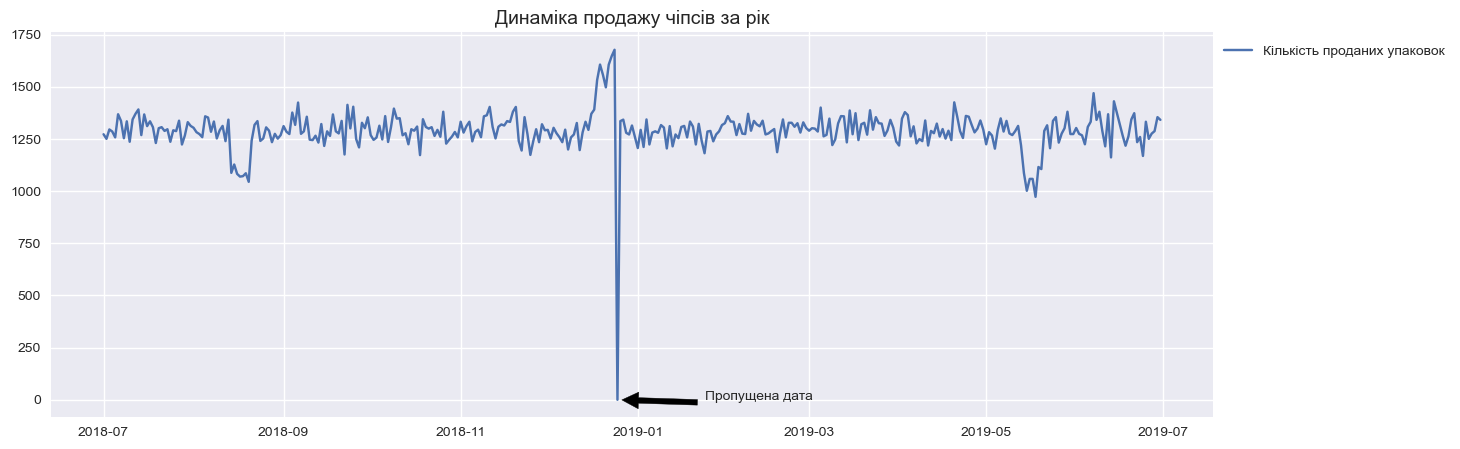

In [65]:
grouped = transaction_data[['DATE', 'PROD_QTY']].groupby('DATE').sum() #кількість проданих чіпсів кожного дня

#Додаєм пропущену дату та даємо значення "0"
grouped.loc[miss_date[0]]=[0]
grouped=grouped.sort_index()

#Будуємо графік
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(grouped, label='Кількість проданих упаковок')
plt.title('Динаміка продажу чіпсів за рік', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.21, 1))
ax.annotate( 'Пропущена дата', xy=((miss_date[0]), 0), xytext=((miss_date[0])+pd.Timedelta(days=30), 1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


Бачимо, що зростання продажів відбувається напередодні Різдва на сам день Різдва немає розпродажів. Можемо припустити, що це через закриття магазинів Різдвяний день.

<Axes: ylabel='Frequency'>

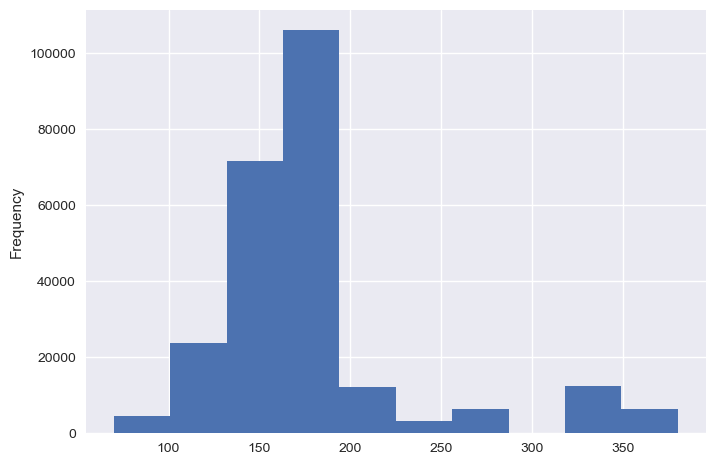

In [66]:
#Визначаємо розмір упаковки
# Додаєм стовпець 'PACKET_SIZE'
transaction_data['PACKET_SIZE']=transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(int)
#Гістограма розподілу 'PACKET_SIZE'
transaction_data['PACKET_SIZE'].plot(kind='hist')

In [67]:
#Відокремлюємо перше слово в назві товару як бренд
#Додаєм стопець'BRAND'
transaction_data['BRAND']=transaction_data['PROD_NAME'].str.extract(r'(\S+)')
#Замінюємо 'Red' ( Red Rock Deli) на RRD
transaction_data['BRAND']=transaction_data['BRAND'].str.replace('Red', 'RRD')
#Замінюємо 'WW' на  'Woolworths'
transaction_data['BRAND']=transaction_data['BRAND'].str.replace('WW', 'Woolworths')
#Замінюємо 'Natural' (Natural Chip Compny) на 'NCC'
transaction_data['BRAND']=transaction_data['BRAND'].str.replace('Natural', 'NCC')
#Замінюємо 'Smith'  на 'Smiths'
transaction_data['BRAND']=transaction_data['BRAND'].str.replace(r'(\bSmith\b)', 'Smiths', regex= True)
#Замінюємо  'Snbts ' на 'Sunbites'
transaction_data['BRAND']=transaction_data['BRAND'].str.replace('Snbts ', 'Sunbites')

transaction_data['BRAND']=transaction_data['BRAND'].str.replace('Infzns  ', "Infuzions")

transaction_data['BRAND']=transaction_data['BRAND'].str.replace(r'(\bDorito\b)', 'Doritos', regex= True)

transaction_data['BRAND']=transaction_data['BRAND'].str.replace('Grain', "GrnWves")


In [68]:
transaction_data['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Thins         14075
Woolworths    11836
Infuzions     11057
Cobs           9693
Tostitos       9471
Twisties       9454
GrnWves        7740
NCC            7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Infzns         3144
Cheetos        2927
Snbts          1576
Burger         1564
Sunbites       1432
French         1418
Name: count, dtype: int64

# Customer data

In [69]:
customer=pd.read_csv(r'C:\Users\BOSS\Desktop\DATA\python_folder\poject_1\QVI_purchase_behaviour.csv')

In [70]:
customer.info()
customer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Дані customer не потребують очищення

<!--  -->

In [71]:
# Обєднуємо ransaction_data та customer 
df=pd.merge(transaction_data, customer , on='LYLTY_CARD_NBR', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PACKET_SIZE       246740 non-null  int32         
 9   BRAND             246740 non-null  object        
 10  LIFESTAGE         246740 non-null  object        
 11  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 21.6+ MB


In [72]:
# Збереження df( transaction_data + customer)
# df.to_csv(r'C:\Users\BOSS\Desktop\DATA\python_folder\poject_1\QVI_data.csv')

# Аналіз
- Який сегмент клієнтів витрачає найбільше на чіпси (враховуючи загальний обсяг продажів), і які характеристики цих клієнтів за категоріями LIFESTAGE та PREMIUM_CUSTOMER?

- Скільки клієнтів належить до кожного сегмента?

- Скільки упаковок чіпсів в середньому купує один клієнт у кожному сегменті?

- Яка середня ціна упаковки чіпсів у кожному сегменті?

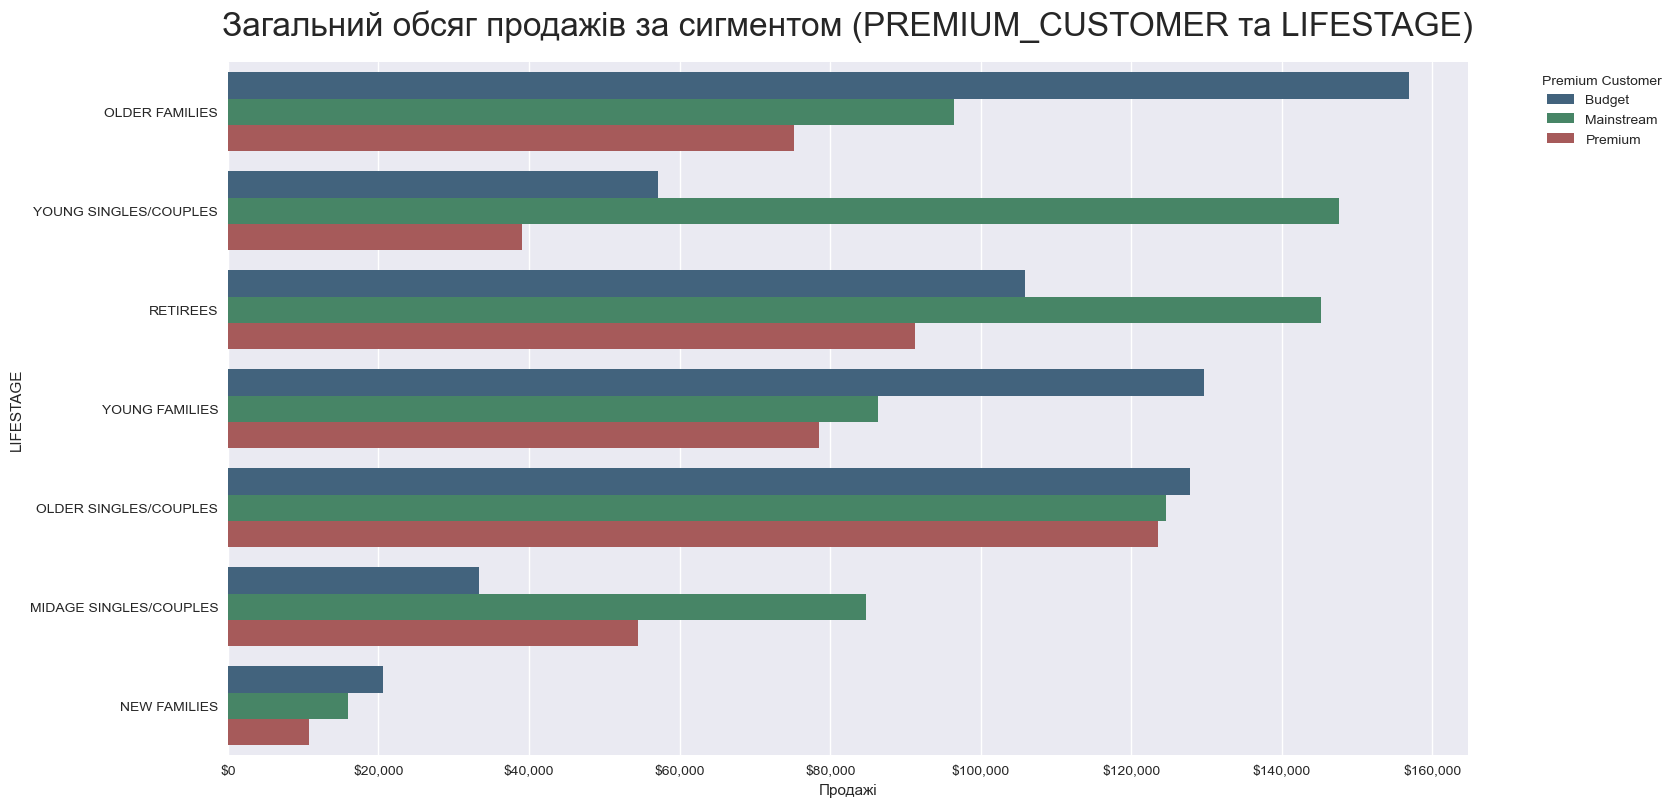

In [73]:
#Групуван даних
grouped_df=df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)

# Визначення кольорів для кожної групи PREMIUM_CUSTOMER
custom_palette = {'Budget': '#386487','Mainstream': '#3d8f66','Premium': '#b34d4d'}

# Створення графіка
plt.figure(figsize=(16, 9))
g=sns.barplot(data=grouped_df, y='LIFESTAGE', x='TOT_SALES', hue='PREMIUM_CUSTOMER', palette=custom_palette)

# Налаштування графіка
plt.title('Загальний обсяг продажів за сигментом (PREMIUM_CUSTOMER та LIFESTAGE)', size=24, pad=20)
plt.xlabel('Продажі')
plt.ylabel('LIFESTAGE')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')  # Позиція легенди
g.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.show()

Продажі надходять в основному від Budget - older families, Mainstream - young singles/couples, та Mainstream - retirees.


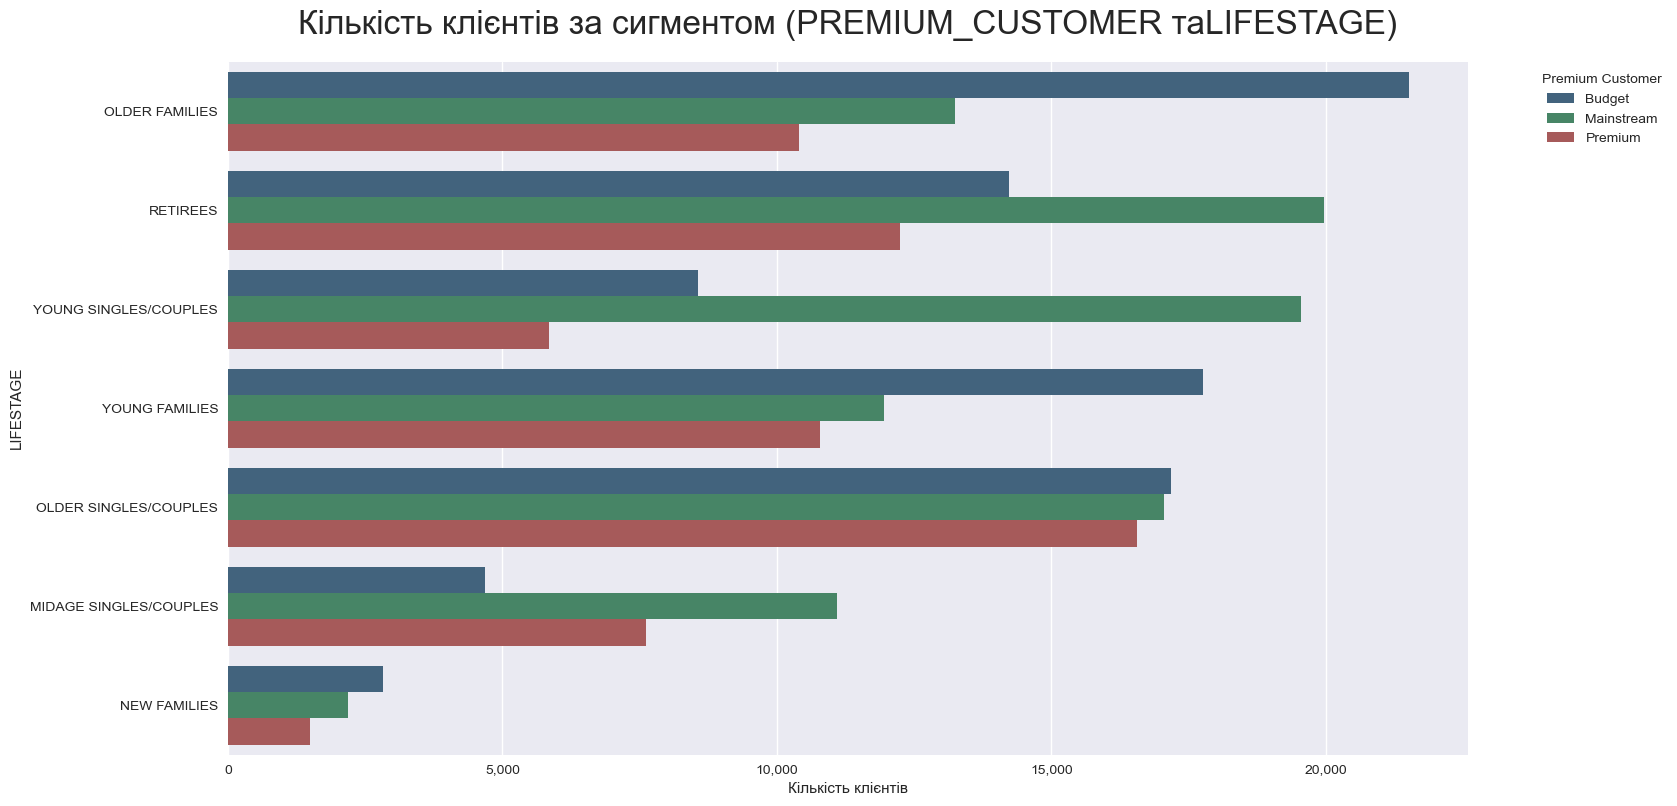

In [74]:
# Групування даних
customer_group_count=df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].count().reset_index().sort_values(by='LYLTY_CARD_NBR', ascending=False)

# Побудова графіка
plt.figure(figsize=(16,9))
g=sns.barplot(data= customer_group_count, y='LIFESTAGE', x='LYLTY_CARD_NBR', hue='PREMIUM_CUSTOMER',palette=custom_palette)

# Налаштування графіка
plt.title('Кількість клієнтів за сигментом (PREMIUM_CUSTOMER таLIFESTAGE)', size=24, pad=20)
plt.xlabel('Кількість клієнтів')
plt.ylabel('LIFESTAGE')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

Перевіремо скільки в середньому купують упаковок чіпсів з сегментом покупця.

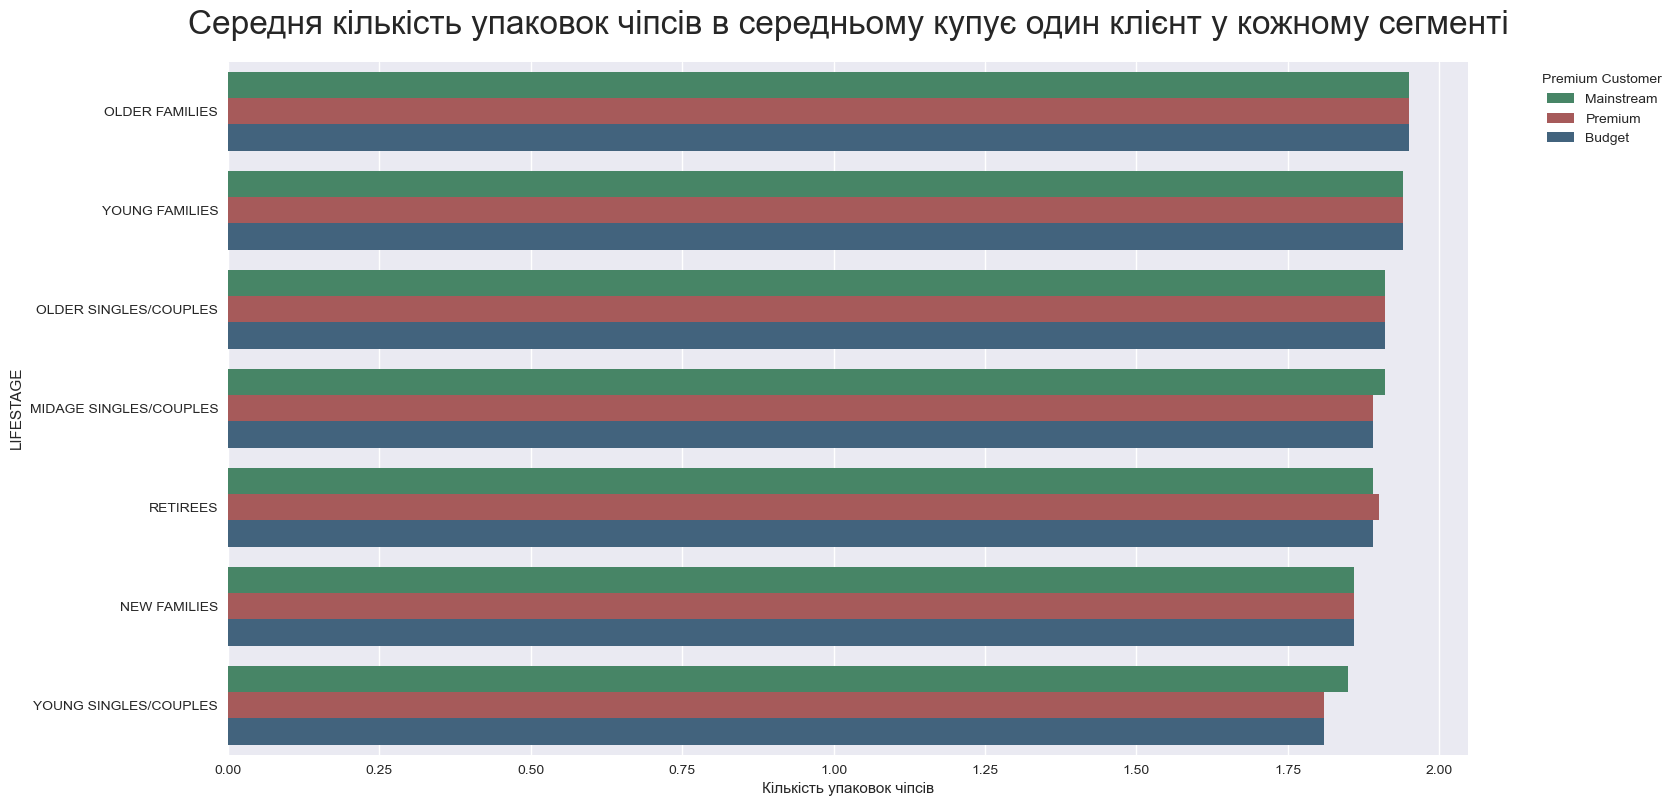

In [75]:
# Групування даних
customer_group_avg=df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].mean().reset_index().sort_values(by='PROD_QTY', ascending=False)
customer_group_avg['PROD_QTY']=customer_group_avg['PROD_QTY'].round(2)

# Побудова графіка
plt.figure(figsize=(16,9))
g=sns.barplot(data= customer_group_avg, y='LIFESTAGE', x='PROD_QTY', hue='PREMIUM_CUSTOMER', palette=custom_palette)

# Налаштування графіка
plt.title('Середня кількість упаковок чіпсів в середньому купує один клієнт у кожному сегменті', size=24, pad=20)
plt.xlabel('Кількість упаковок чіпсів')
plt.ylabel('LIFESTAGE')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Older families та young families купують найбільше чіпсів

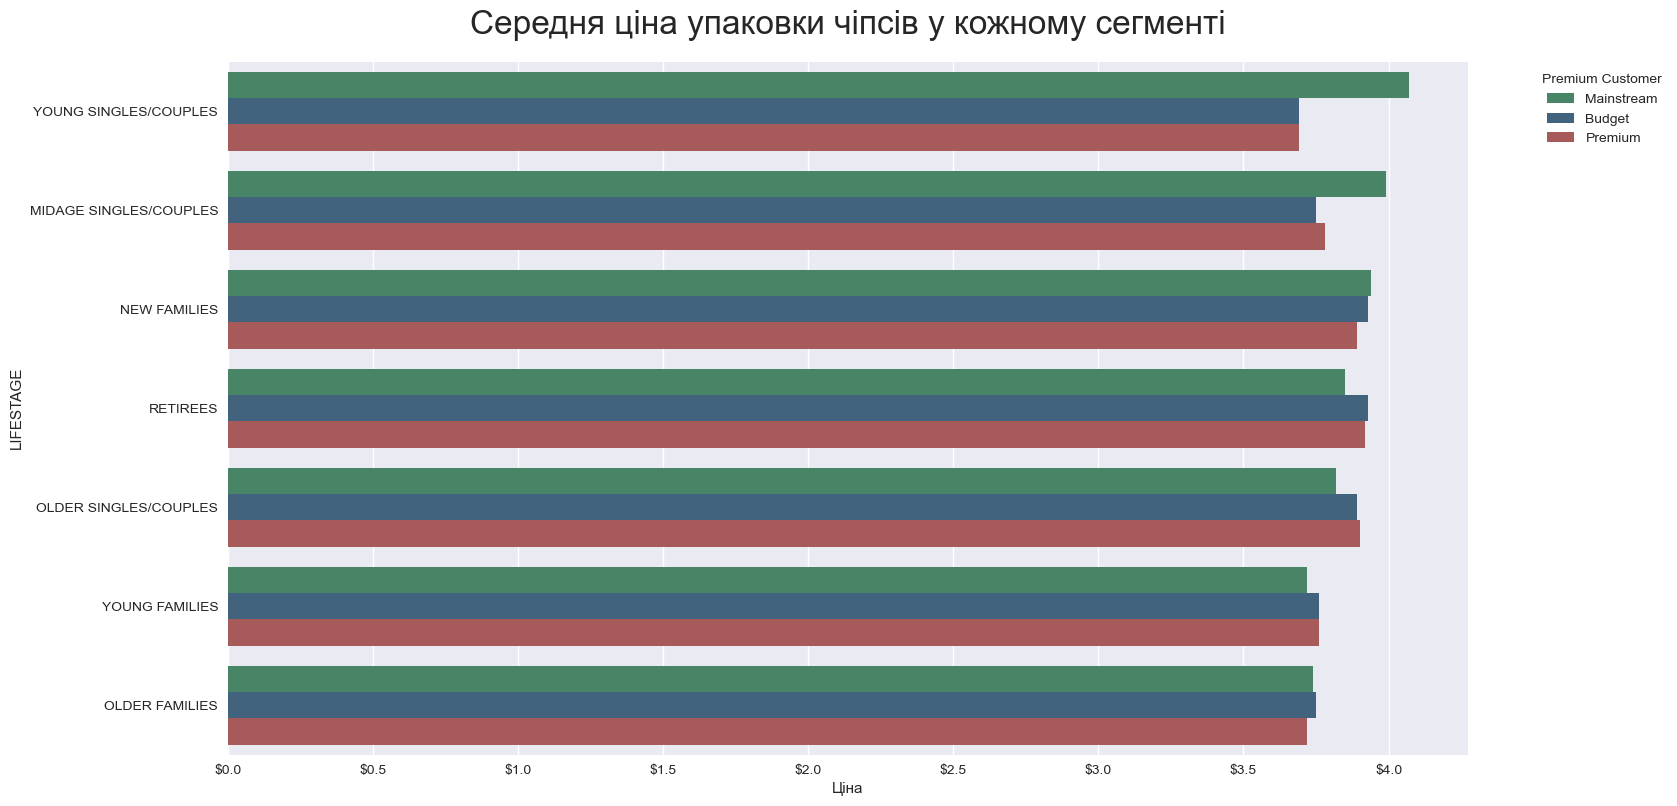

In [76]:
# Групування данихю
price_group=df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])[['TOT_SALES','PROD_QTY']].sum()
price_group['AVG_Price']= (price_group['TOT_SALES']/price_group['PROD_QTY']).round(2) # Середня ціна продажу
price_group=price_group.reset_index().sort_values(by='AVG_Price', ascending=False)

# Побудова графіка
plt.figure(figsize=(16,9))
g=sns.barplot(data= price_group, y='LIFESTAGE', x='AVG_Price', hue='PREMIUM_CUSTOMER',palette=custom_palette)

# Налаштування графіка
plt.title('Середня ціна упаковки чіпсів у кожному сегменті', size=24, pad=20)
plt.xlabel('Ціна')
plt.ylabel('LIFESTAGE')
plt.legend(title='Premium Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
g.xaxis.set_major_formatter(StrMethodFormatter('${x:.1f}'))
plt.show()


Групи Mainstream Young Singles/Couples та Midage Single/Couples готові витрачати більше на дорогі чіпси. Перевіримо, чи існує статистично значуща різниця між цими двома групами та всіма іншими покупцями. 

Використаємо t-тест для порівняння середніх значень витрат, та перепірки нашого припущення.
- Н0 (нульова гіпотеза): Середні витрати на чіпси для груп Mainstream Young Singles/Couples та Midage Single/Couples не відрізняються від середніх витрат решти груп.
- Н1 (альтернативна гіпотеза): Середні витрати на чіпси для груп Mainstream Young Singles/Couples та Midage Single/Couples статистично значущо відрізняються від середніх витрат решти груп..

In [84]:
from scipy import stats
df['SALES_PER_QTY']= df['TOT_SALES']/df['PROD_QTY']
#гурпа 1 Mainstream Young Singles/Couples + Mainstream Midage Singles/Cuopeles 
group_1=df[(df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['SALES_PER_QTY']

# група 2  
group_2=df[(df['PREMIUM_CUSTOMER'] != 'Mainstream') & (df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]['SALES_PER_QTY']


# Обчислення t та р
t_stat, p_value = stats.ttest_ind(group_1,group_2)
# Резултат
print(f"t-stat : {t_stat}, p-value: {p_value}")

t-stat : 37.83196107667815, p-value: 2.235645611549355e-309


p-value < 0.05 та t-stat = 37.83 означає, що є статистично значуща різниця між середніми значеннями витрат двох груп, і можна стверджувати, що ці групи мають різні середні витрати на чіпси.
Отже, Mainstream Young Singles/Couples та Midage Single/Couples дійсно купувати дорощі товари катеогорії чіпси.

### Підсумок
Сегмент Budget Older Families приносить найбільший дохід від продажів чіпсів, оскільки вони купують найбільше упаковок. Однак, ці споживачі витрачають найменше на кожну упаковку, віддаючи перевагу бюджетним брендам.  

Сегмент Mainstream Young Singles/Couples також робить значний внесок у дохід, купуючи дорожчі упаковки чіпсів, що збільшує витрати на кожну одиницю.  

Сегмент Mainstream Retirees приносить значну частку доходу не через кількість покупок, а через відносно невелику популяцію в сегменті, що призводить до вищої середньої вартості на покупця.  

Сегмент Mainstream Midage Singles/Couples купує багато упаковок чіпсів і обирає дорожчі бренди, однак мала чисельність цього сегменту призводить до нижчої частки доходу загалом.

### Розглянемо, які бренди та розміри упаковок користуються найбільшою популярністю серед споживачів.

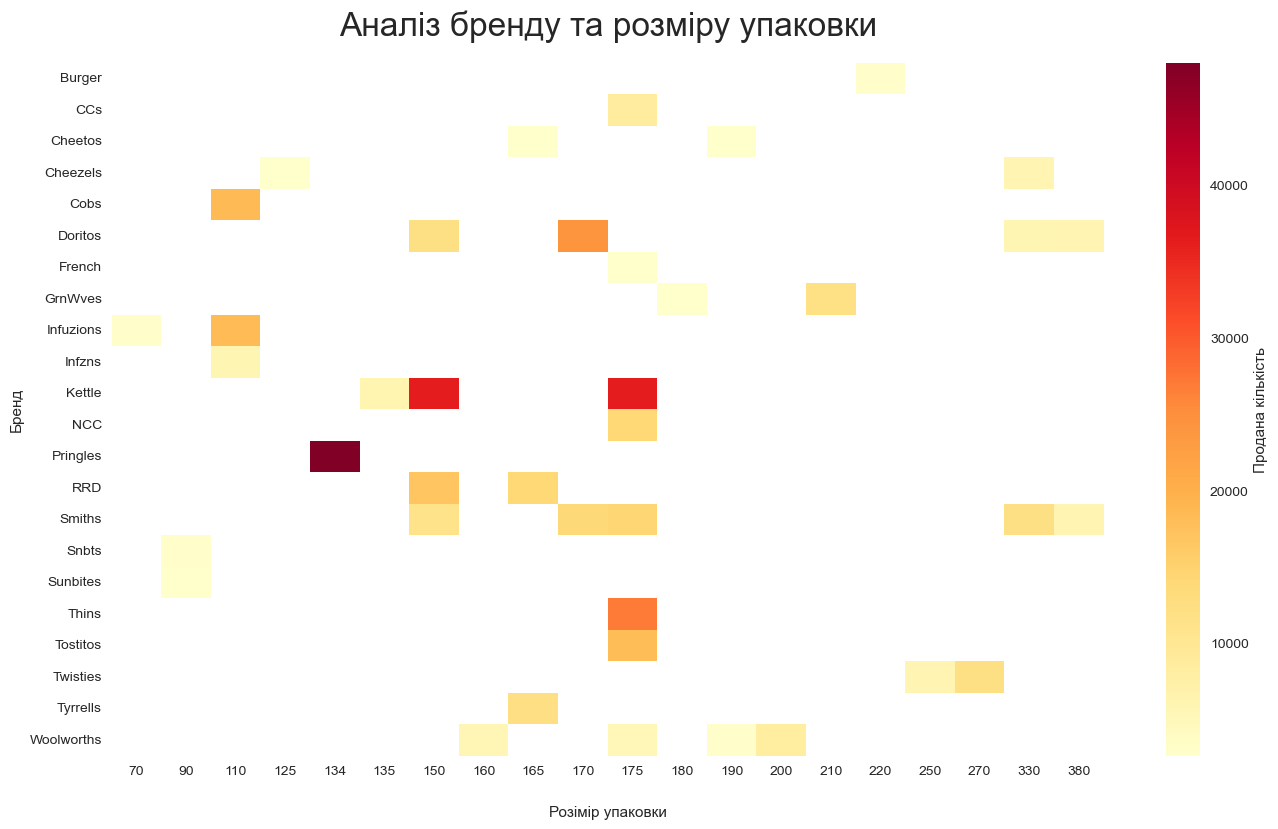

In [79]:

size_pivot = df.pivot_table(index='BRAND', columns='PACKET_SIZE', values='PROD_QTY', aggfunc='sum')
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(size_pivot, cmap='YlOrRd', annot=False, ax=ax, cbar_kws={'label':'Продана кількість'})
ax.set_facecolor('white')
plt.title('Аналіз бренду та розміру упаковки', size=24, pad=20)
plt.ylabel('Бренд')
plt.xlabel('Розімір упаковки', labelpad=20)
plt.show()

Найбільшою популярністю користуються чіпси Pringles в упаковці 134 г.   
Також покупці віддають перевагу чіпсам Kettle в упаковках 150 г та 175 г, тоді як упаковка 135 г виявилася менш популярною — ймовірно, споживачі схиляються до вибору більшого об’єму.  
Крім того, як популярні бренди можна виділити Thins у форматі 175 г та Doritos в упаковці 170 г.

In [85]:

segment1 = df[(df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (df['PREMIUM_CUSTOMER'] == "Mainstream")]
other = df[~((df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (df['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Кількість продукції в сегменті та інших
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Кількість продукції за брендом в сегменті та інших
quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1

quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other

# Злиття даних
brand_proportions = pd.merge(quantity_segment1_by_brand[['BRAND', 'targetSegment']],
                             quantity_other_by_brand[['BRAND', 'other']],
                             on='BRAND')

# Обчислення показника прихильності до бренду
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Сортування результатів
brand_proportions_sorted = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Виведення результатів
print(brand_proportions_sorted)

         BRAND  targetSegment     other  affinityToBrand
20    Tyrrells       0.031553  0.025692         1.228095
19    Twisties       0.046184  0.037877         1.219319
5      Doritos       0.122761  0.101075         1.214553
10      Kettle       0.197985  0.165553         1.195897
18    Tostitos       0.045411  0.037978         1.195713
9       Infzns       0.014934  0.012573         1.187790
12    Pringles       0.119420  0.100635         1.186670
4         Cobs       0.044638  0.039049         1.143124
8    Infuzions       0.049745  0.044491         1.118074
17       Thins       0.060373  0.056986         1.059423
7      GrnWves       0.032712  0.031188         1.048873
3     Cheezels       0.017971  0.018647         0.963753
14      Smiths       0.096370  0.124584         0.773536
6       French       0.003948  0.005758         0.685569
2      Cheetos       0.008033  0.012067         0.665733
13         RRD       0.043810  0.067494         0.649091
11         NCC       0.019600  

Ми можемо побачити, що:

Молоді одинаки/пари основного сегменту на 23% більше схильні купувати чіпси Tyrrells у порівнянні з рештою населення.
Молоді одинаки/пари основного сегменту на 56% менше схильні купувати Burger Rings у порівнянні з рештою населення.

In [89]:

# Кількість продукції за розміром упаковки в сегменті
quantity_segment1_by_pack = segment1.groupby('PACKET_SIZE')['PROD_QTY'].sum().reset_index()
total_segment1_quantity = quantity_segment1_by_pack['PROD_QTY'].sum()  # Сума для сегмента 1
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / total_segment1_quantity

# Кількість продукції за розміром упаковки в інших
quantity_other_by_pack = other.groupby('PACKET_SIZE')['PROD_QTY'].sum().reset_index()
total_other_quantity = quantity_other_by_pack['PROD_QTY'].sum()  # Сума для інших
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / total_other_quantity

# Злиття результатів
pack_proportions = pd.merge(quantity_segment1_by_pack[['PACKET_SIZE', 'targetSegment']],
                            quantity_other_by_pack[['PACKET_SIZE', 'other']],
                            on='PACKET_SIZE')

# Обчислення показника прихильності до упаковки
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Сортування результатів
pack_proportions_sorted = pack_proportions.sort_values(by='affinityToPack', ascending=False)

# Виведення результатів
print(pack_proportions_sorted)

    PACKET_SIZE  targetSegment     other  affinityToPack
17          270       0.031829  0.025096        1.268287
19          380       0.032160  0.025584        1.257030
18          330       0.061284  0.050162        1.221717
4           134       0.119420  0.100635        1.186670
2           110       0.106280  0.089791        1.183637
14          210       0.029124  0.025121        1.159318
5           135       0.014769  0.013075        1.129511
16          250       0.014355  0.012781        1.123166
9           170       0.080773  0.080986        0.997370
6           150       0.157598  0.163421        0.964372
10          175       0.254990  0.270007        0.944382
8           165       0.055652  0.062268        0.893757
12          190       0.007481  0.012442        0.601271
11          180       0.003589  0.006067        0.591538
7           160       0.006404  0.012373        0.517616
1            90       0.006349  0.012580        0.504698
3           125       0.003009 

Схоже, що молоді одинаки/пари основного сегменту на 27% більше схильні купувати упаковку чіпсів об’ємом 270 г у порівнянні з рештою населення, але давайте розглянемо, які бренди продають цей розмір упаковки.

In [93]:
df['BRAND'][df['PACKET_SIZE']==270].unique()

array(['Twisties'], dtype=object)


Twisties є єдиним брендом, що пропонує упаковки по 270 г, тому це може свідчити про вищу ймовірність покупки саме чіпсів Twisties.  
